<a href="https://colab.research.google.com/github/LayneV/CS4410/blob/main/Homwork7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
#90% accuracy with the Fashion-MNIST data compared to the 99% with the MNIST data
#The Fashion-MNIST data took around 11.5 minutes to train while the MNIST took around 5 minutes
#Adding another Dense layer with 4096 neurons changed the training speed to 35.26 minutes to complete and the accuracy went up to 91.23%

In [121]:
from tensorflow.keras.datasets import fashion_mnist

In [122]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [123]:
X_train.shape

(60000, 28, 28)

In [124]:
y_train.shape

(60000,)

In [125]:
X_test.shape

(10000, 28, 28)

In [126]:
y_test.shape

(10000,)

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


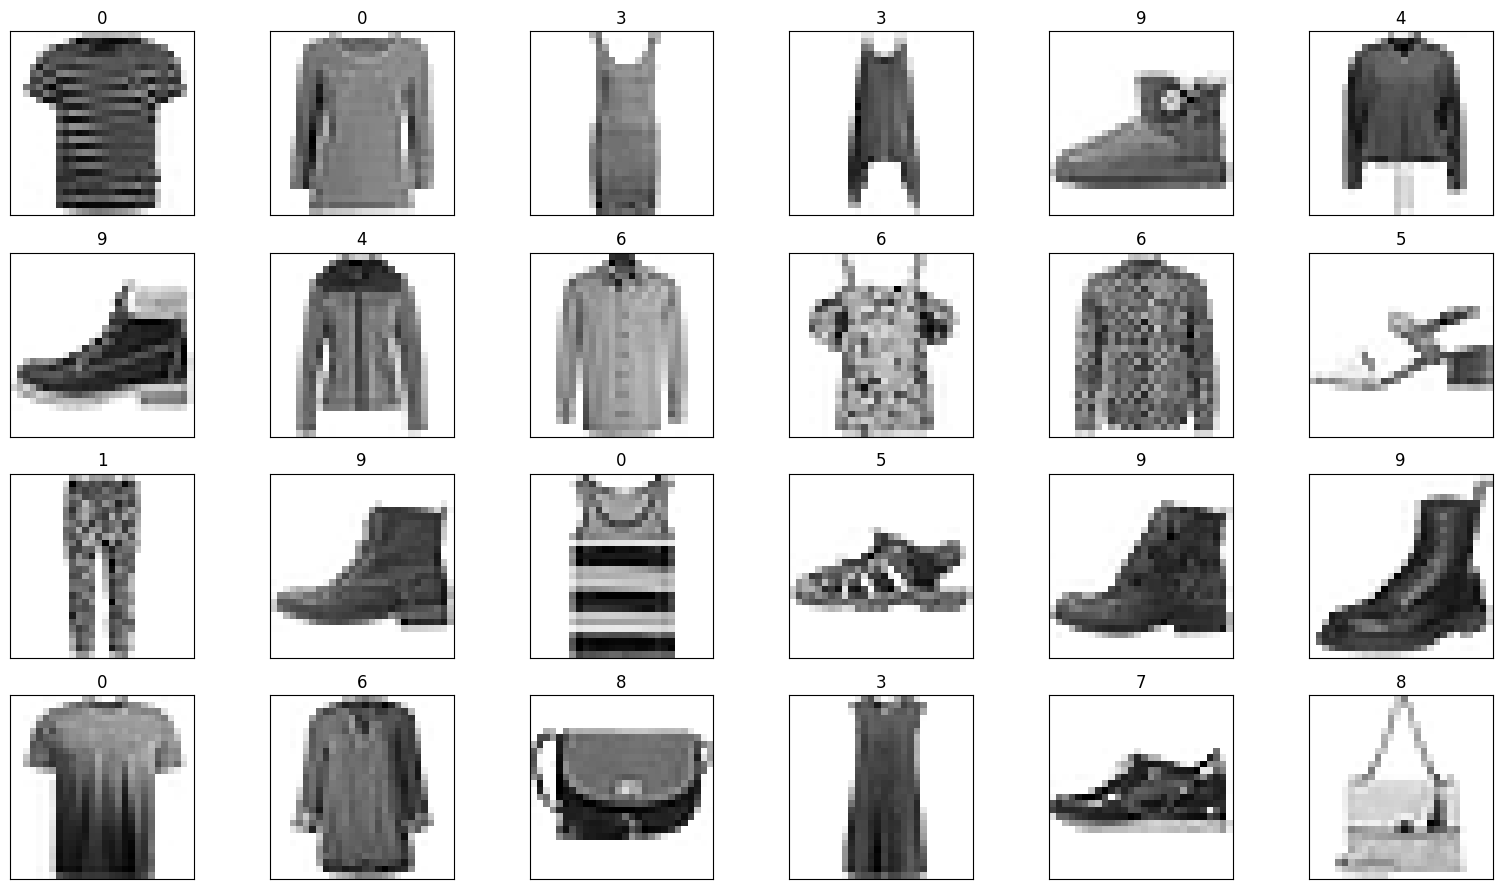

In [128]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)

plt.tight_layout()

In [129]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [130]:
X_train.shape

(60000, 28, 28, 1)

In [131]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [132]:
X_test.shape

(10000, 28, 28, 1)

In [133]:
X_train = X_train.astype('float32') / 255

In [134]:
X_test = X_test.astype('float32') / 255


In [135]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [136]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [137]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

In [138]:
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [139]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [140]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [141]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [142]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [143]:
cnn.add(Flatten())

In [144]:
cnn.add(Dense(units=4096, activation='relu'))


In [145]:
cnn.add(Dense(units=128, activation='relu'))

In [146]:
cnn.add(Dense(units=10, activation='softmax'))

In [147]:
cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      13,111,296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,711,498 (52.31 MB)

 Trainable params: 13,711,498 (52.31 MB)

 Non-trainable params: 0 (0.00 B)

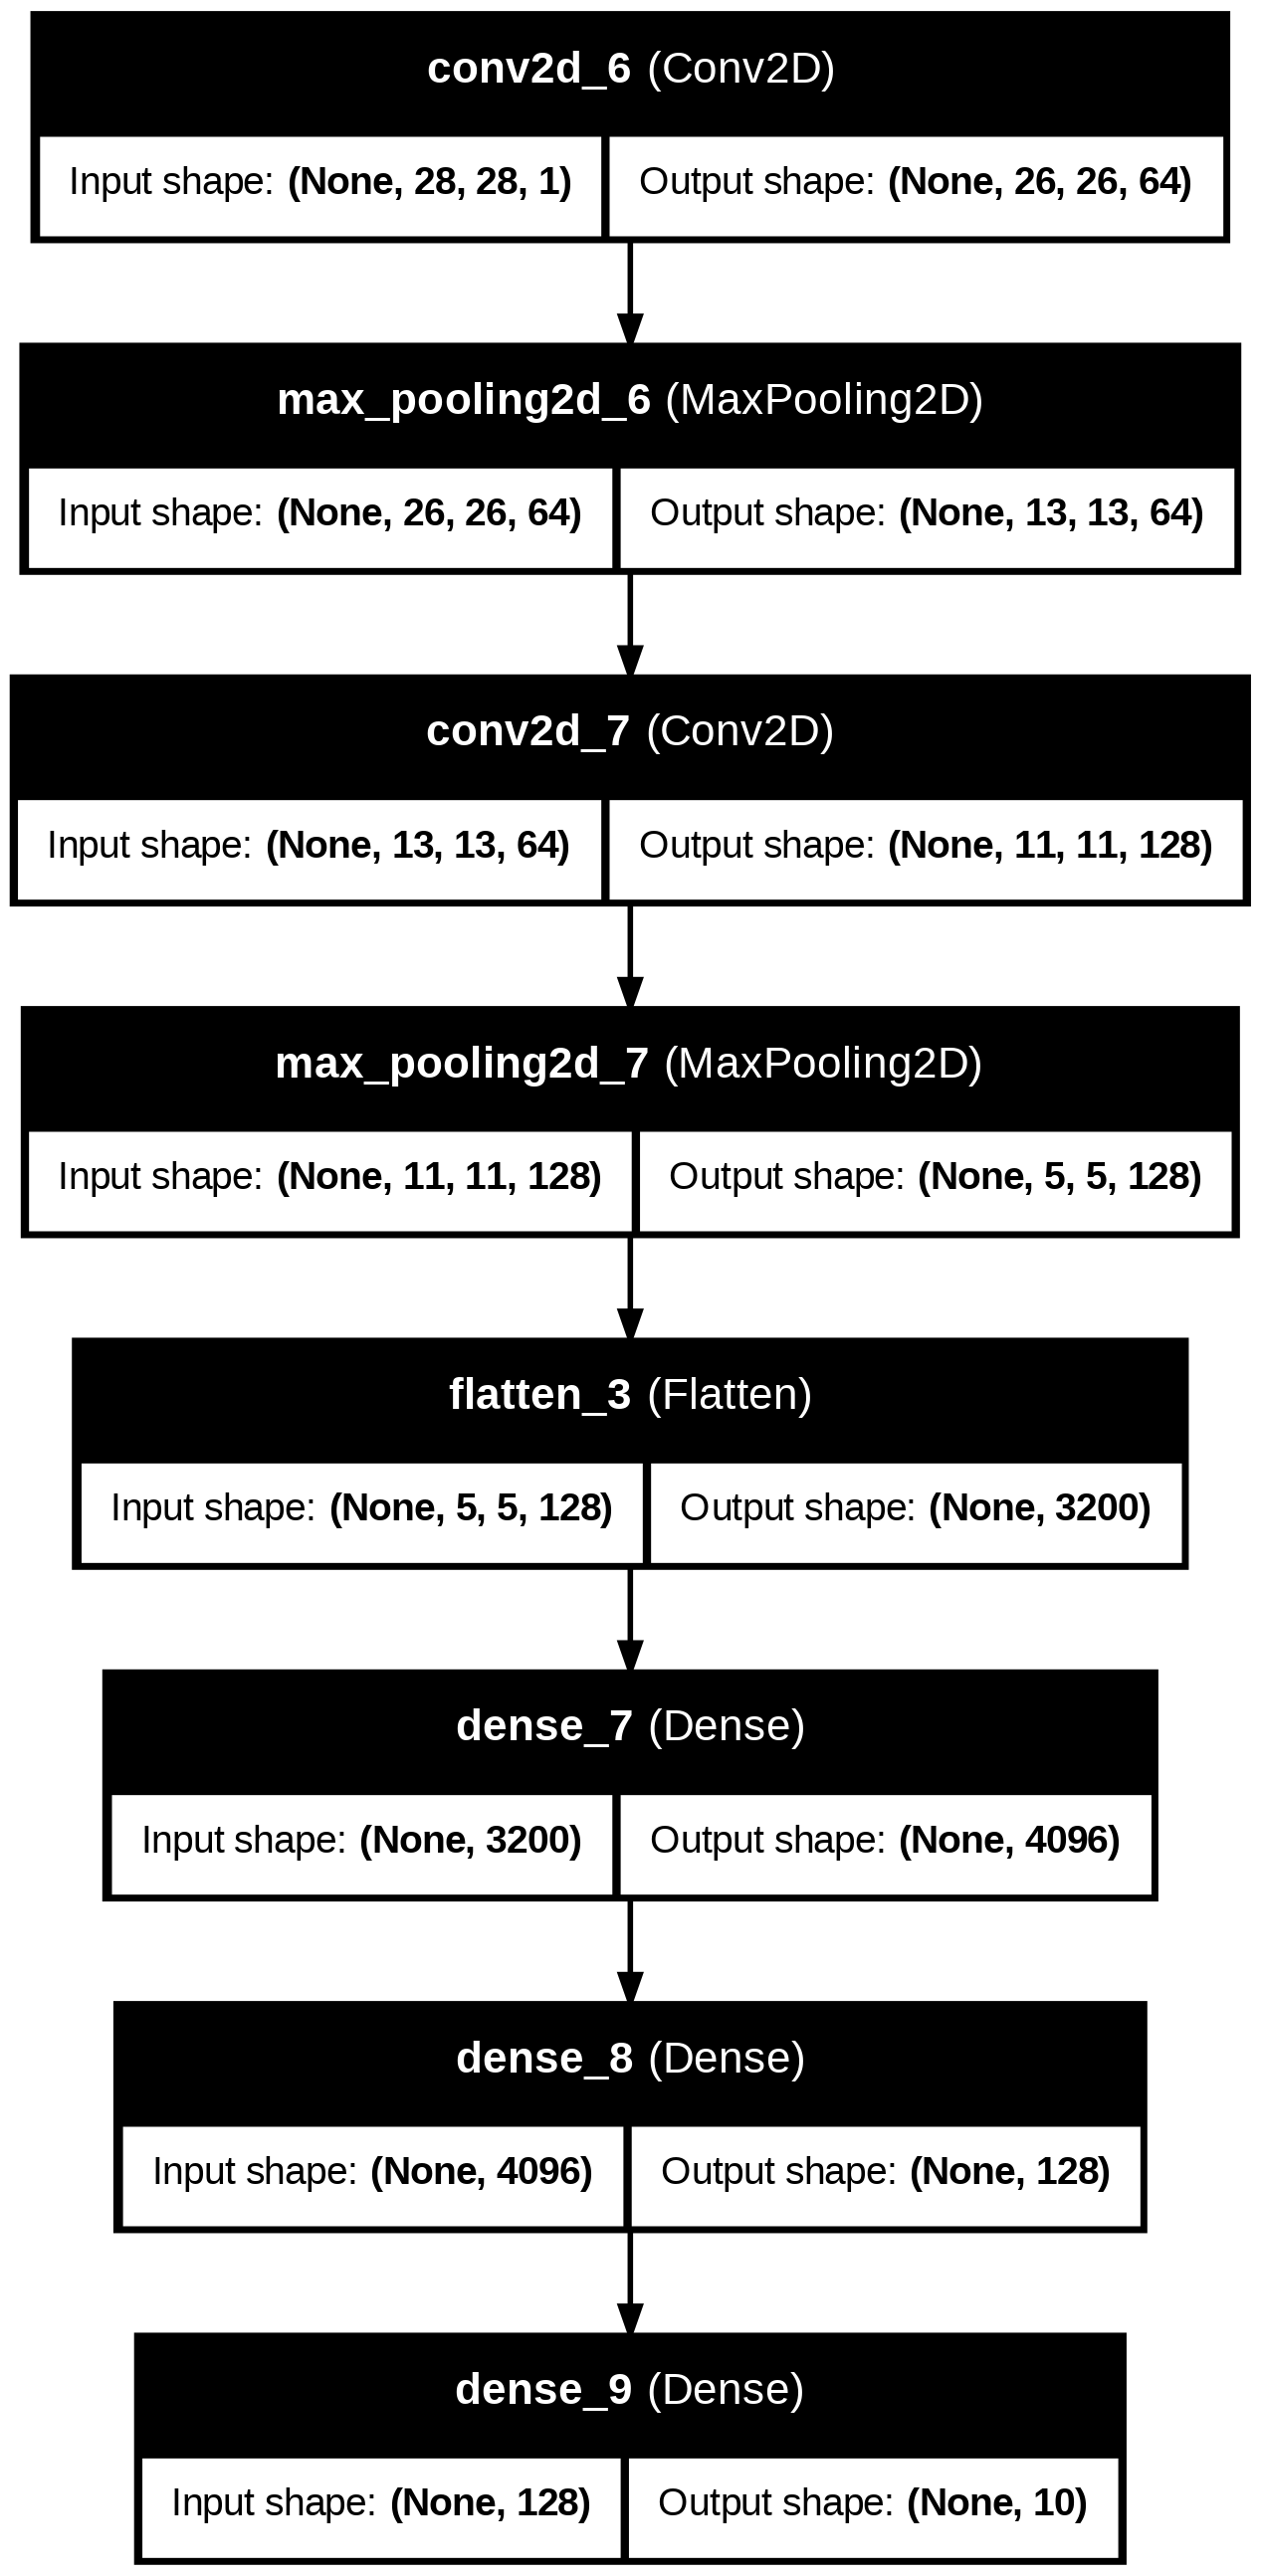

In [148]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')

In [149]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [150]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 394s 464ms/step - accuracy: 0.7862 - loss: 0.5922 - val_accuracy: 0.8703 - val_loss: 0.3316
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 396s 469ms/step - accuracy: 0.8951 - loss: 0.2833 - val_accuracy: 0.8857 - val_loss: 0.2943
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 443s 470ms/step - accuracy: 0.9131 - loss: 0.2293 - val_accuracy: 0.9058 - val_loss: 0.2508
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 441s 470ms/step - accuracy: 0.9285 - loss: 0.1855 - val_accuracy: 0.8948 - val_loss: 0.2803
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 442s 470ms/step - accuracy: 0.9402 - loss: 0.1571 - val_accuracy: 0.9170 - val_loss: 0.2389


In [151]:
loss, accuracy = cnn.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - accuracy: 0.9118 - loss: 0.2577


In [152]:
loss

0.25653043389320374

In [153]:
accuracy


0.9122999906539917

In [154]:
predictions = cnn.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step


In [155]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [156]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000447%
1: 0.0000000451%
2: 0.0000000072%
3: 0.0000000066%
4: 0.0000000019%
5: 0.0001270148%
6: 0.0000009069%
7: 0.0005011907%
8: 0.0000008669%
9: 99.9993622303%


In [157]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

In [158]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [159]:
len(incorrect_predictions)

877

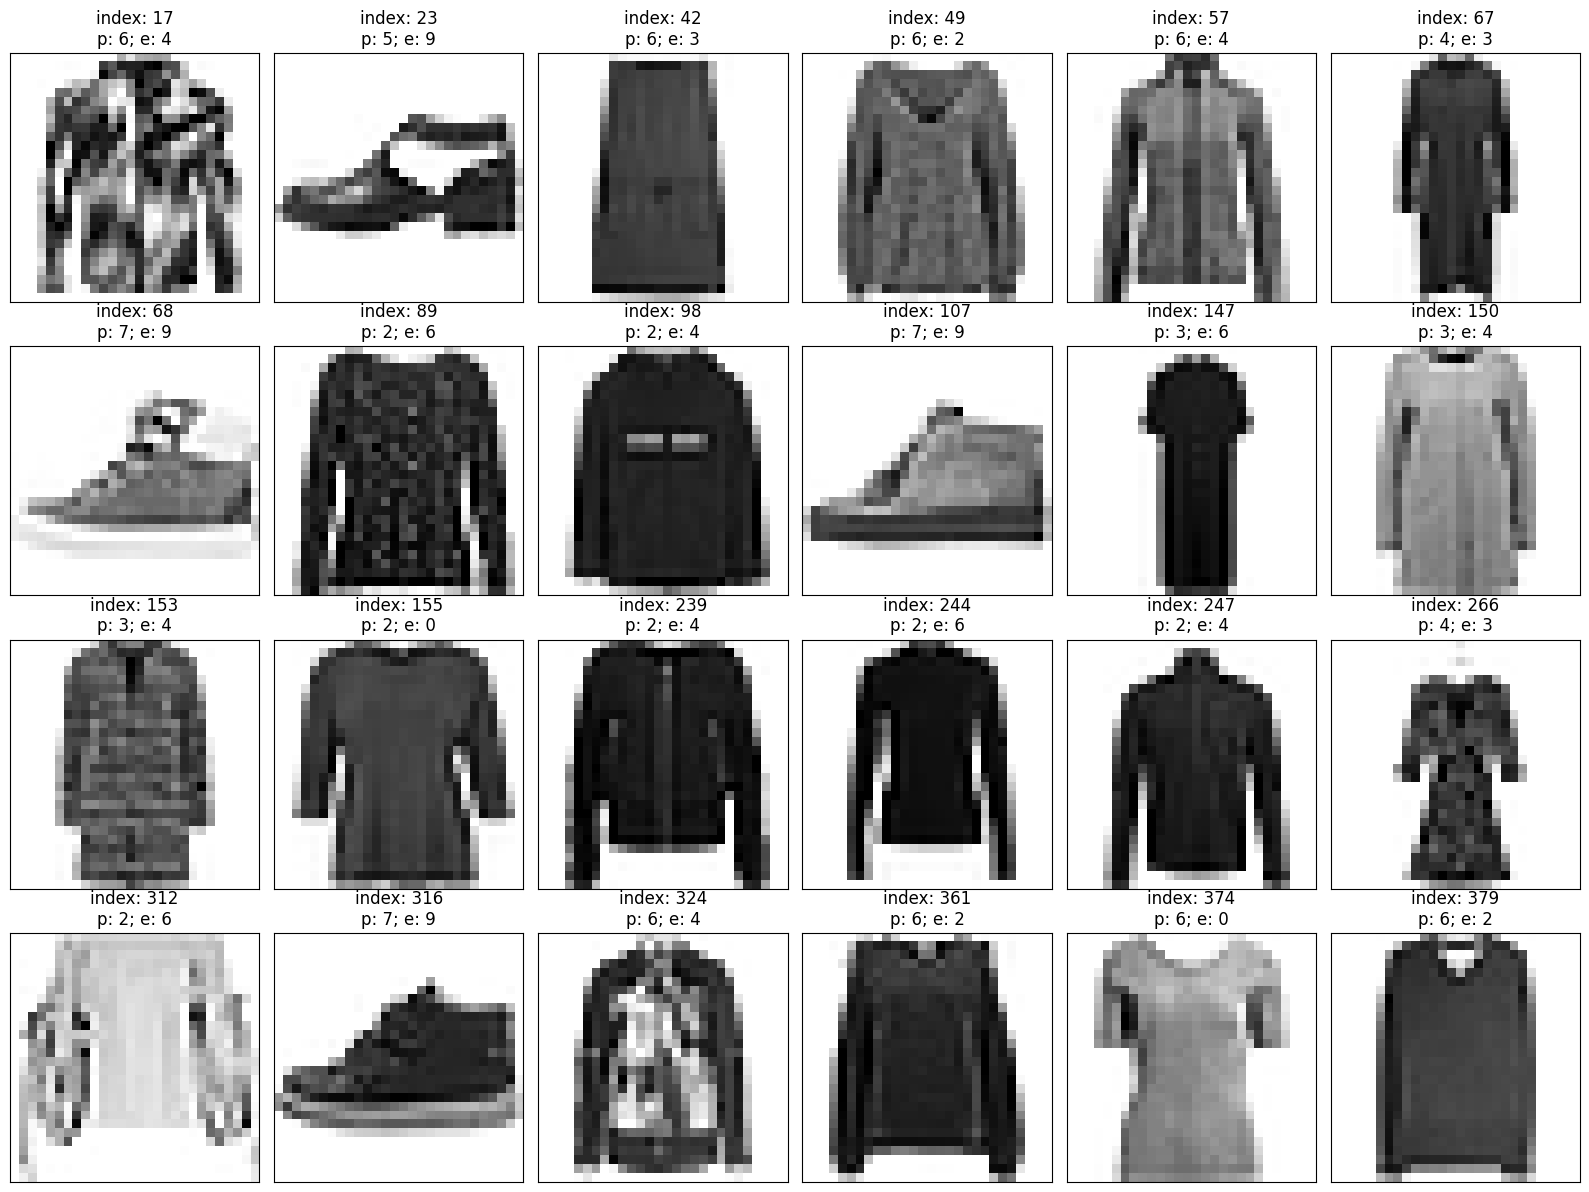

In [160]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()